In [2]:
#Linear Regression Test 
#10/30/2024

import joblib
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [230]:
# Adison White's additions


# Takes in src_arr, takes its src_col and shifts it shift rows (in our dataset, it's how many days it will be shifted)
# It will then delete shift+remove rows from the set
#
# So it returns an array that is size(rows-shift, columns+1)
#
# the fact it's 3 lines kills me
def append_column_and_shift(src_arr, src_col, shift, remove=0):
    
    # Gets the column and rows before shift rows from the end (effectively deleting those elements)
    new_col = src_arr[:shift*-1,src_col]
    
    # Delete first rows of array
    int_arr = src_arr[shift:,:]

    # Adds the new column to the array
    new_arr = np.append(int_arr, new_col[:, np.newaxis], axis=1)

    if remove > 0:
        return new_arr[:-1*remove]
    
    return new_arr

# Does basically what's above but just returns one column (for y)
def get_y_data(src_arr, src_col, shift, remove):
    ret_col = src_arr[shift:,src_col]

    ret_col = ret_col[remove:]
        
    return ret_col

In [259]:
data = pd.read_csv('berkshire_hathaway_data.csv')

#All given features
X_0 = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values

# Parameters
day = 1         # Days in future to test
y_col = 3       # Which feature to use (Close = 3)
column = 3      # Which feature to duplicate (Close = 3)
length = 14      # How many prev days to include for dataset

# Transform data
X = X_0
if length > 0:
    X = append_column_and_shift(X, column, 1, day)
    for i in range(1, length):
        X = append_column_and_shift(X, len(X[0])-1, 1, 0)

y = get_y_data(X_0, y_col, day, length)[:,np.newaxis]

# print(X[:6,6])
# print(y[:6])
# print(X.shape)
# print(y.shape)

samples in X: 2342
samples in y: 2342
training set samples: 2000
testing set samples: 342
MSE: 48.32765422723499
R squared error: 0.9609208048300791


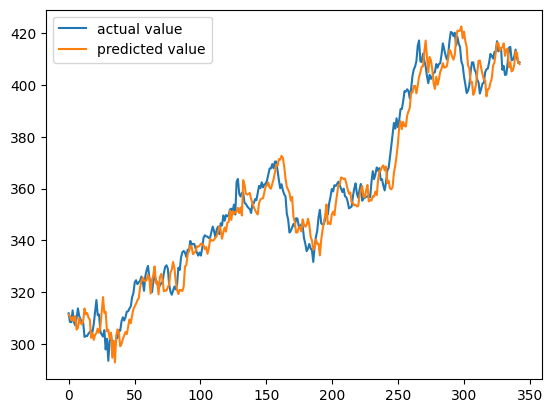

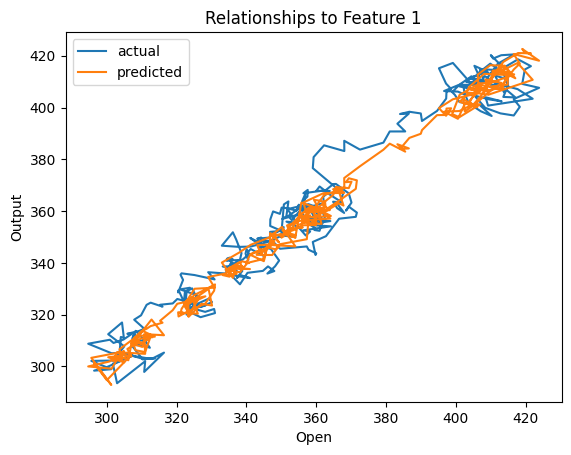

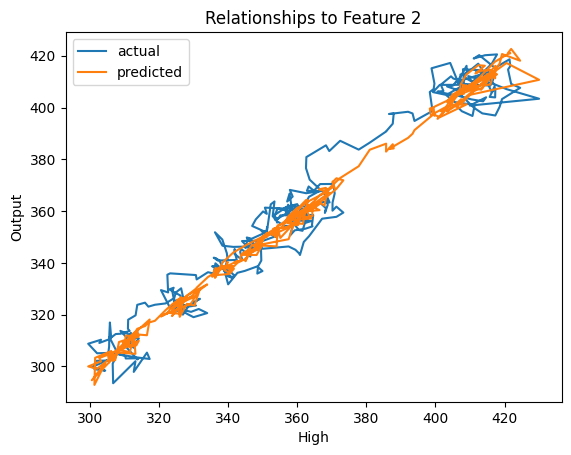

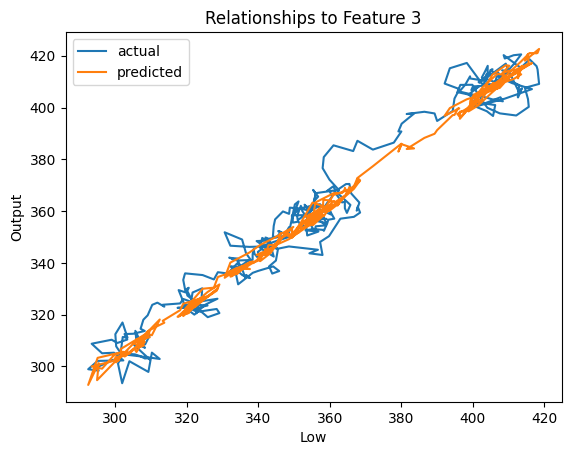

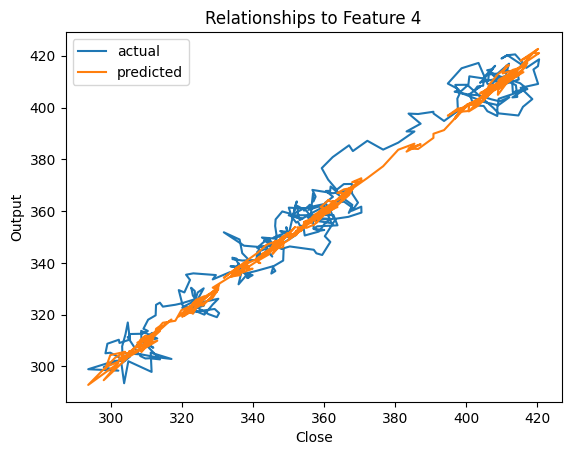

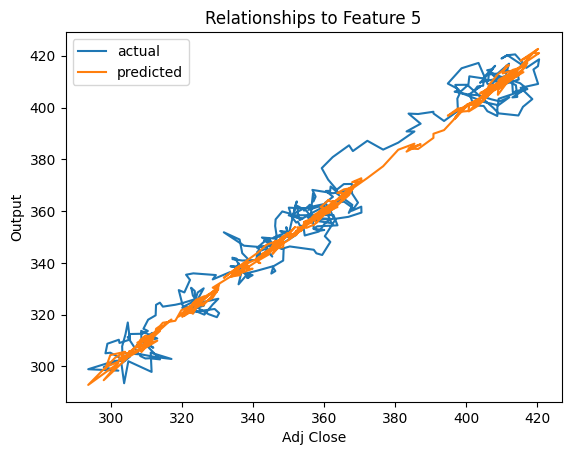

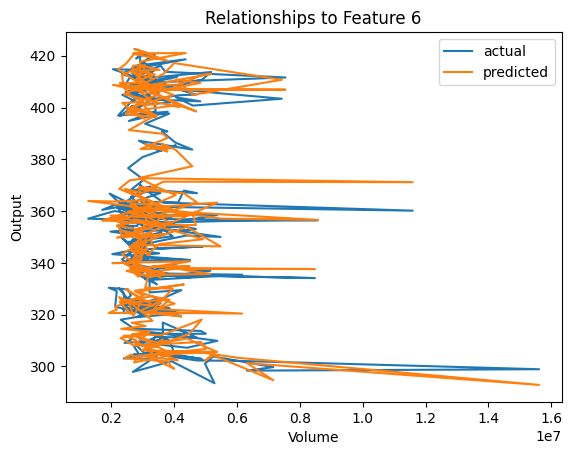

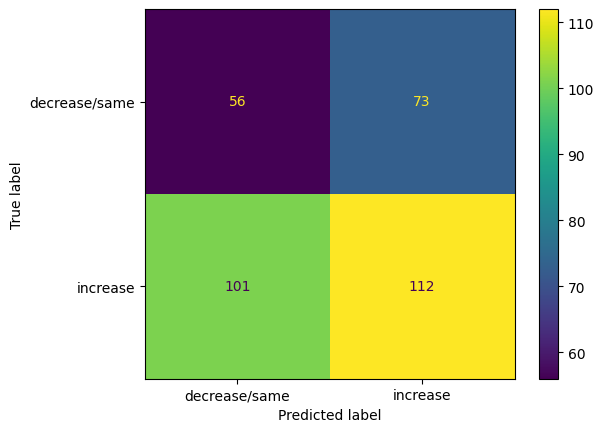

              precision    recall  f1-score   support

           0       0.36      0.43      0.39       129
           1       0.61      0.53      0.56       213

    accuracy                           0.49       342
   macro avg       0.48      0.48      0.48       342
weighted avg       0.51      0.49      0.50       342



In [258]:
# (Mostly) Buck's code

#set up vectors
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=325)
print(f'samples in X: {X.shape[0]}\nsamples in y: {y.shape[0]}')
split_point = 2000
X_train = X[:split_point]
X_test = X[split_point:]
y_train = y[:split_point]
y_test = y[split_point:]
print(f'training set samples: {X_train.shape[0]}\ntesting set samples: {X_test.shape[0]}')

test_size = np.array(X_test.shape[0])           #for graphing
x_axis = np.linspace(0,test_size, test_size)    #for graphing

#train and evaluate model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Pickle model
joblib.dump(lin_reg_model, './lin_reg_model.pkl')

y_linreg = lin_reg_model.predict(X_test)
r2_linreg = r2_score(y_test, y_linreg)
mse_linreg = mean_squared_error(y_test, y_linreg)
print(f'MSE: {mse_linreg}\nR squared error: {r2_linreg}')

#compare real values and what was predicted, graphically 
plt.plot(x_axis, y_test, label = 'actual value')
plt.plot(x_axis, y_linreg, label = 'predicted value')
plt.legend()
plt.show()

#compare a given day's close (left) with forecasted close after however many days (right)
##to see if the predicted change is significant
    #comp = np.c_[X_test[:,3], y_linreg]
    #print(comp)


#show relationship between features and output
open_feature = X[split_point:,0]
plt.plot(open_feature, y_test, label = 'actual')
plt.plot(open_feature, y_linreg, label = 'predicted')
plt.xlabel("Open")
plt.ylabel("Output")
plt.title("Relationships to Feature 1")
plt.legend()
plt.show()

high_feature = X[split_point:,1]
plt.plot(high_feature, y_test, label = 'actual')
plt.plot(high_feature, y_linreg, label = 'predicted')
plt.xlabel("High")
plt.ylabel("Output")
plt.title("Relationships to Feature 2")
plt.legend()
plt.show()

low_feature = X[split_point:,2]
plt.plot(low_feature, y_test, label = 'actual')
plt.plot(low_feature, y_linreg, label = 'predicted')
plt.xlabel("Low")
plt.ylabel("Output")
plt.title("Relationships to Feature 3")
plt.legend()
plt.show()

close_feature = X[split_point:,3]
plt.plot(close_feature, y_test, label = 'actual')
plt.plot(close_feature, y_linreg, label = 'predicted')
plt.xlabel("Close")
plt.ylabel("Output")
plt.title("Relationships to Feature 4")
plt.legend()
plt.show()

adjclose_feature = X[split_point:,4]
plt.plot(adjclose_feature, y_test, label = 'actual')
plt.plot(adjclose_feature, y_linreg, label = 'predicted')
plt.xlabel("Adj Close")
plt.ylabel("Output")
plt.title("Relationships to Feature 5")
plt.legend()
plt.show()

volume_feature = X[split_point:,5]
plt.plot(volume_feature, y_test, label = 'actual')
plt.plot(volume_feature, y_linreg, label = 'predicted')
plt.xlabel("Volume")
plt.ylabel("Output")
plt.title("Relationships to Feature 6")
plt.legend()
plt.show()



#now try classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

clas_y = []
for i in range(0, len(y_test)):
    if (y_test[i] > X_test[i][4]): clas_y.append(1)
    else: clas_y.append(0)

clas_yhat = []
for i in range(0, len(y_linreg)):
    if (y_linreg[i] > X_test[i][4]): clas_yhat.append(1)
    else: clas_yhat.append(0)

cm = confusion_matrix(clas_y, clas_yhat)
disp = ConfusionMatrixDisplay.from_predictions(clas_y, clas_yhat, display_labels=['decrease/same', 'increase'])
plt.show()
print(classification_report(clas_y, clas_yhat))